In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import f1_score
from collections import Counter
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

In [2]:
sample_submission = pd.read_csv("../input/liverpool-ion-switching/sample_submission.csv")

sub_1 = pd.read_csv("../input/ion-ensemble-2/submission_3gru_data_augment_no_tta_dim_256_20200511_0.csv")
sub_2 = pd.read_csv("../input/ion-ensemble-2/submission_cnn_rnn_block_prediction_tta_dim_320_20200513_0.csv")
sub_3 = pd.read_csv("../input/ion-ensemble-2/submission_wavenet (1).csv")
sub_4 = pd.read_csv("../input/ion-ensemble-2/Fwd_Bwd_FFT_scaled.csv")

In [3]:
final_output =(sub_1.open_channels + \
               sub_2.open_channels + \
               sub_3.open_channels + \
               sub_4.open_channels
                  ) / 4
final_output = np.array(np.round(final_output, 0), np.int) 

In [4]:
Counter(final_output)

Counter({0: 1220701,
         1: 216389,
         2: 117713,
         3: 135039,
         4: 80653,
         5: 55762,
         10: 7103,
         9: 26909,
         8: 49830,
         7: 52192,
         6: 37709})

In [5]:
sample_submission['open_channels'] = final_output

In [6]:
def count_value(df : pd.DataFrame) -> pd.DataFrame :
    
    print('batch 1')
    a = 0
    print(a)
    print(Counter(df.iloc[100000*a:100000*(a+1)]['open_channels'].values))
    
    a = 1
    print(a)
    print(Counter(df.iloc[100000*a:100000*(a+1)]['open_channels'].values))
    #reset_target = np.where(df.iloc[100000*a:100000*(a+1)]['open_channels'].values > 1)
    
    a = 2
    print(a)
    print(Counter(df.iloc[100000*a:100000*(a+1)]['open_channels'].values))
    
    a = 3
    print(a)
    print(Counter(df.iloc[100000*a:100000*(a+1)]['open_channels'].values))
    
    a = 4
    print(a)
    print(Counter(df.iloc[100000*a:100000*(a+1)]['open_channels'].values))
    
    
    
    
    print('batch 2')
    a = 5
    print(a)
    print(Counter(df.iloc[100000*a:100000*(a+1)]['open_channels'].values))
    
    a = 6
    print(a)
    print(Counter(df.iloc[100000*a:100000*(a+1)]['open_channels'].values))
    
    a = 7
    print(a)
    print(Counter(df.iloc[100000*a:100000*(a+1)]['open_channels'].values))
    
    a = 8
    print(a)
    print(Counter(df.iloc[100000*a:100000*(a+1)]['open_channels'].values))
    
    a = 9
    print(a)
    print(Counter(df.iloc[100000*a:100000*(a+1)]['open_channels'].values))
    
    
    batches = df.shape[0] // 500000
    for i in range(batches):
        #print('batch {}'.format(i+1))
        idx = np.arange(i*500000, (i+1)*500000)
        #if (i == 2) or (i==3):
        print('batch {}'.format(i+1))
        print(Counter(df.loc[idx, 'open_channels'].values))

In [7]:
count_value(sample_submission)

batch 1
0
Counter({0: 92672, 1: 7327, 2: 1})
1
Counter({2: 42412, 3: 37734, 1: 17407, 0: 2446, 4: 1})
2
Counter({4: 37349, 3: 29312, 5: 18922, 2: 11677, 1: 2567, 0: 173})
3
Counter({0: 88206, 1: 10899, 2: 840, 3: 55})
4
Counter({1: 73975, 0: 26024, 2: 1})
batch 2
5
Counter({7: 25704, 8: 24554, 6: 18905, 9: 13380, 5: 9263, 10: 3732, 4: 3462, 3: 834, 2: 155, 1: 11})
6
Counter({4: 36916, 3: 29121, 5: 18709, 2: 12446, 1: 2568, 0: 239, 6: 1})
7
Counter({7: 26488, 8: 25276, 6: 18803, 9: 13529, 5: 8868, 10: 3371, 4: 2925, 3: 649, 2: 83, 1: 8})
8
Counter({0: 92234, 1: 7029, 2: 728, 3: 9})
9
Counter({2: 44615, 3: 36953, 1: 16619, 0: 1813})
batch 1
Counter({0: 209521, 1: 112175, 3: 67101, 2: 54931, 4: 37350, 5: 18922})
batch 2
Counter({0: 94286, 3: 67566, 2: 58027, 7: 52192, 8: 49830, 4: 43303, 6: 37709, 5: 36840, 9: 26909, 1: 26235, 10: 7103})
batch 3
Counter({0: 456178, 1: 41237, 2: 2326, 3: 259})
batch 4
Counter({0: 460716, 1: 36742, 2: 2429, 3: 113})


In [8]:
def reset_batch_1_2(df, a, max_num):
    
    idx = np.arange(a*100000, (a+1)*100000)
    reset_target = np.where(df.iloc[100000*a:100000*(a+1)]['open_channels'].values > max_num)
    for j in reset_target: 
        df.loc[idx[0] + j, 'open_channels'] = max_num
        
        
    return df

In [9]:
def reset_value(df : pd.DataFrame) -> pd.DataFrame :
    
    
    for a, max_num in zip(range(10), [1, 3, 5, 3, 1, 10, 5, 10, 3, 3]):
        df = reset_batch_1_2(df, a, max_num)
        
    #batch #3, #4
    #batches = df.shape[0] // 500000
    #for i in range(batches):
        #idx = np.arange(i*500000, (i+1)*500000)
        #if (i == 2) or (i==3):
            #print('reset output batch {}'.format(i+1))
            #reset_target = np.where(df.loc[idx, 'open_channels'].values > 1)
            #for j in reset_target:
                #df.loc[idx[0] + j, 'open_channels'] = 1
                
    return df

In [10]:
sample_submission = reset_value(sample_submission)

In [11]:
count_value(sample_submission)

batch 1
0
Counter({0: 92672, 1: 7328})
1
Counter({2: 42412, 3: 37735, 1: 17407, 0: 2446})
2
Counter({4: 37349, 3: 29312, 5: 18922, 2: 11677, 1: 2567, 0: 173})
3
Counter({0: 88206, 1: 10899, 2: 840, 3: 55})
4
Counter({1: 73976, 0: 26024})
batch 2
5
Counter({7: 25704, 8: 24554, 6: 18905, 9: 13380, 5: 9263, 10: 3732, 4: 3462, 3: 834, 2: 155, 1: 11})
6
Counter({4: 36916, 3: 29121, 5: 18710, 2: 12446, 1: 2568, 0: 239})
7
Counter({7: 26488, 8: 25276, 6: 18803, 9: 13529, 5: 8868, 10: 3371, 4: 2925, 3: 649, 2: 83, 1: 8})
8
Counter({0: 92234, 1: 7029, 2: 728, 3: 9})
9
Counter({2: 44615, 3: 36953, 1: 16619, 0: 1813})
batch 1
Counter({0: 209521, 1: 112177, 3: 67102, 2: 54929, 4: 37349, 5: 18922})
batch 2
Counter({0: 94286, 3: 67566, 2: 58027, 7: 52192, 8: 49830, 4: 43303, 6: 37708, 5: 36841, 9: 26909, 1: 26235, 10: 7103})
batch 3
Counter({0: 456178, 1: 41237, 2: 2326, 3: 259})
batch 4
Counter({0: 460716, 1: 36742, 2: 2429, 3: 113})


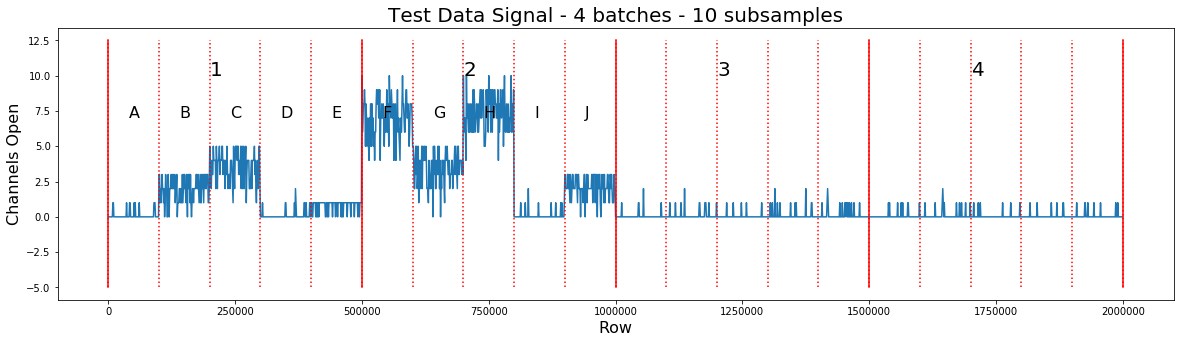

In [12]:
plt.figure(figsize=(20,5))
res = 1000; let = ['A','B','C','D','E','F','G','H','I','J']
plt.plot(range(0,sample_submission.shape[0],res),sample_submission.open_channels[0::res])
for i in range(5): plt.plot([i*500000,i*500000],[-5,12.5],'r')
for j in range(21): plt.plot([j*100000,j*100000],[-5,12.5],'r:')
for k in range(4): plt.text(k*500000+200000,10,str(k+1),size=20)
for k in range(10): plt.text(k*100000+40000,7,let[k],size=16)
plt.xlabel('Row',size=16); plt.ylabel('Channels Open',size=16); 
plt.title('Test Data Signal - 4 batches - 10 subsamples',size=20)
plt.show()

In [13]:
sample_submission.to_csv("submission_20200511.csv", index=False, float_format='%.4f')

In [14]:
len(sample_submission[sample_submission['open_channels'] != 0])

779299